# 액티브 6번이랑 2번 다시 확인

- 산업코드차수가 10으로 표기된 것으로 보아 한국표준산업코드 10차를 기반으로 한 것 같음  
하지만 코드 데이터가 일치하지 않는 데이터들이 다수 있는것으로 확인됨

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import date, datetime, timedelta
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

---
# 데이터 불러오기
---

In [2]:
layout = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/넘블 챌린지 개방데이터 레이아웃.xlsx')
codezip = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/넘블 챌린지 개방데이터 코드집.xlsx')

# 액티브는 sheet 3개 (기업개요_외감 / 기업개요 / 휴폐업이력) 
active_ex = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/액티브 중소법인 재무보유.xlsx', sheet_name = 0)
active_normal = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/액티브 중소법인 재무보유.xlsx', sheet_name = 1)
active_history = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/액티브 중소법인 재무보유.xlsx', sheet_name = 2)

# 휴페업은 sheet 2개 (기업개요 / 휴폐업이력)
close_normal = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/휴폐업 중소법인 재무보유.xlsx',sheet_name = 0)
close_history = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/휴폐업 중소법인 재무보유.xlsx',sheet_name = 1)

finance = pd.read_table('/content/drive/MyDrive/Numble_Challenge/data/재무데이터.txt', encoding = 'CP949')

In [3]:
print('#'*60)
print('액티브 중소법인 "기업개요_외감" 데이터셋 크기 :',active_ex.shape)
print('액티브 중소법인 "기업개요" 데이터셋 크기 :',active_normal.shape)
print('액티브 중소법인 "휴폐업이력" 데이터셋 크기 :',active_history.shape)
print('#'*60)
print('휴폐업 중소법인 "기업개요" 데이터셋 크기 :',close_normal.shape)
print('휴폐업 중소법인 "휴폐업이력" 데이터셋 크기 :',close_history.shape)
print('#'*60)
print('재무 데이터셋 크기: ',finance.shape)
print('#'*60)

############################################################
액티브 중소법인 "기업개요_외감" 데이터셋 크기 : (28982, 28)
액티브 중소법인 "기업개요" 데이터셋 크기 : (198651, 31)
액티브 중소법인 "휴폐업이력" 데이터셋 크기 : (4827, 5)
############################################################
휴폐업 중소법인 "기업개요" 데이터셋 크기 : (6739, 28)
휴폐업 중소법인 "휴폐업이력" 데이터셋 크기 : (6840, 5)
############################################################
재무 데이터셋 크기:  (109142, 46)
############################################################


----
# 액티브 중소법인 데이터 살펴보기
----

---
### 1. 컬럼명 한글로 변경
---

In [4]:
# nan 값 제외
eng = layout['영문칼럼명'].tolist()
len(eng)
kor = layout['한글칼럼명'].tolist()
len(kor)

43

In [5]:
#CMP_NM1로 설정된 컬럼 수정
print('#'*100)
print(active_ex.columns)
print(active_normal.columns)
print(active_ex.shape)
print(active_normal.shape)
print('#'*100)
active_ex.rename(columns={'CMP_NM1':'CMP_NM'}, inplace=True)
del active_normal['CMP_NM1']
print('#'*100)
print(active_ex.columns)
print(active_normal.columns)
print(active_ex.shape)
print(active_normal.shape)
print('#'*100)

####################################################################################################
Index(['BIZ_NO', 'CMP_PFIX_NM', 'CMP_NM1', 'CMP_SFIX_NM', 'CMP_ENM', 'BZ_TYP',
       'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB', 'FR_IVST_CORP_YN',
       'VENT_YN', 'LIST_CD', 'IND_CD_ORDR', 'IND_CD1', 'IND_CD2', 'IND_CD3',
       'PB_ORG_TYP', 'MDSCO_PRTC_YN', 'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB',
       'LIST_DATE', 'MN_BIZ_CONT', 'NATN_NM', 'HOMEPAGE_URL', 'CEO_NM',
       'EMP_CNT'],
      dtype='object')
Index(['BIZ_NO', 'CMP_PFIX_NM', 'CMP_NM', 'CMP_NM1', 'CMP_SFIX_NM', 'CMP_ENM',
       'BZ_TYP', 'CMP_TYP', 'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB',
       'FR_IVST_CORP_YN', 'VENT_YN', 'LIST_CD', 'IND_CD_ORDR', 'IND_CD1',
       'IND_CD2', 'IND_CD3', 'PB_ORG_TYP', 'MDSCO_PRTC_YN', 'TAXN_TYP',
       'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB', 'LIST_DATE', 'MN_BIZ_CONT',
       'NATN_NM', 'HOMEPAGE_URL', 'CEO_NM', 'EMP_CNT'],
      dtype='object')
(28982, 28)
(198651,

In [6]:
# 컬럼명이 일치하는 인덱스 확인
name_ex = active_ex.columns.tolist()

active_ex_list = []
for i in name_ex:
  try:
    active_ex_list.append(eng.index(i))
  except:
    pass

print(active_ex_list)
print(len(active_ex_list))
  
# 한글로 컬럼명 변경
for i in active_ex_list:
  active_ex = active_ex.rename(columns={eng[i] : kor[i]})

print(active_ex.columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
28
Index(['사업자등록번호', '기업접두명', '기업명', '기업접미명', '기업영문명', '업종', '기업규모',
       '공기업구분 1.공기업 2.일반기업', '개인법인구분 1.법인 2.개인', '본점지점구분 1.본점 2.지점',
       '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드차수', '산업코드1', '산업코드2', '산업코드3',
       '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명',
       '홈페이지URL', '대표자명', '직원수'],
      dtype='object')


In [7]:
# 컬럼명이 일치하는 인덱스 확인
name_normal = active_normal.columns.tolist()

active_normal_list = []
for i in name_normal:
  try:
    active_normal_list.append(eng.index(i))
  except:
    pass

print(active_normal_list)
print(len(active_normal_list))
  
# 한글로 컬럼명 변경
for i in active_normal_list:
  active_normal = active_normal.rename(columns={eng[i] : kor[i]})

print(active_normal.columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
28
Index(['사업자등록번호', '기업접두명', '기업명', '기업접미명', '기업영문명', '업종', 'CMP_TYP', '기업규모',
       '공기업구분 1.공기업 2.일반기업', '개인법인구분 1.법인 2.개인', '본점지점구분 1.본점 2.지점',
       '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드차수', '산업코드1', '산업코드2', '산업코드3',
       '공공기관유형', '중견기업보호여부', 'TAXN_TYP', '본점기업코드', '설립일자', '설립구분', '상장일자',
       '주요사업내용', '국가명', '홈페이지URL', '대표자명', '직원수'],
      dtype='object')


---
### 2. 두 데이터 중 컬럼 다른 것은 무엇인가?
---
    'CMP_TYP', 'TAXN_TYP' 가 차이가 존재

    CMP_TYP = 기업형태
    TAXN_TYP = 과세 유형
    

In [8]:
a = []
for i in active_ex.columns:
  a.append(i)
b = []
for j in active_normal.columns:
  b.append(j)
print(len(a))
print(len(b))

c = []
for i in range(len(b)):
  if b[i] not in a:
    c.append(b[i])
print(c)

28
30
['CMP_TYP', 'TAXN_TYP']


---
### 3. 기업개요_외감에 있는 기업들이 기업개요에 포함이 되는가?
---
    불일치하는 데이터는 없음   
    즉 모두 포함이 되어 있음


In [9]:
ex_list = active_ex['사업자등록번호'].tolist()
normal_list = active_normal['사업자등록번호'].tolist()
print('액티브 기업개요_외감의 중소기업 수:',len(ex_list))
print('액티브 기업개요의 중소기업 수:',len(normal_list))


inconsistent = []
for i in range(len(ex_list)):
  if ex_list[i] not in normal_list:
    inconsistent.append(ex_list[i])

print('불일치하는 데이터 수:',len(inconsistent))

액티브 기업개요_외감의 중소기업 수: 28982
액티브 기업개요의 중소기업 수: 198651
불일치하는 데이터 수: 0


---
### 4. 그렇다면 내용도 일치 하는가?
---
    1차 적으로 확인 하니 완벽하게 일치하지 않으며 약 2천여개만 내용까지 일치

In [10]:
test = active_normal.copy()
del test['CMP_TYP'], test['TAXN_TYP']
test.shape

(198651, 28)

In [11]:
print(active_ex.duplicated().sum())
print(test.duplicated().sum())

0
0


In [12]:
print('#'*60)
print('합치기 전 기업개요_외감 사이즈:',len(active_ex))
print('합치기 전 기업개요 사이즈:',len(test))
print('#'*60)
test_concat = pd.concat([active_ex,test], ignore_index = True)
print('합친 후 총 사이즈:',len(test_concat))
print('#'*60)
print('중복 사이즈:', test_concat.duplicated().sum())
test_concat = test_concat.drop_duplicates()
print('중복제거 후 총 사이즈:',len(test_concat))
print('#'*60)

############################################################
합치기 전 기업개요_외감 사이즈: 28982
합치기 전 기업개요 사이즈: 198651
############################################################
합친 후 총 사이즈: 227633
############################################################
중복 사이즈: 1233
중복제거 후 총 사이즈: 226400
############################################################


---
### 5. 오늘자로 부터 설입일자를 뺀 후 기업존속기간을 일자로 계산
---
- 오기입처럼 보이는 데이터들이 있어서 1950년 이후의 데이터들만 계산

---
#### 5-1 "기업개요_외감"   
---
    가장 오래된 기업의 일자: 26493일
    가장 짧은 기업의 일자: 91일

  

In [13]:
active_ex['설립일자'].isnull().sum()

1074

In [14]:
# 현 float64 형태를 str로 변경 해줘야 됨
# 빈 값들을 살려주기 위해 -1로 변환 후 다시 공백 변환
active_ex['설립일자'] = active_ex['설립일자'].fillna(-1).astype('int64').replace({-1:None})

# 1950년 보다 작게 설정된 값들은 오기입 으로 간주하고 모두 Null(-1)값으로 변환
for i in range(len(active_ex)):
  try:
    if active_ex['설립일자'][i] < 19500000 :
      active_ex['설립일자'][i] = -1
  except:
    pass

active_ex['설립일자'] = active_ex['설립일자'].fillna(-1).astype('str').replace({'-1':None})

In [15]:
# 데에티 중 20000700과 같이 일자가 00으로 체크된 데이터 01로 임의로 변경
for i in range(len(active_ex)):
  try:
    if active_ex['설립일자'][i][-2 : ] == '00':
      active_ex['설립일자'][i] = active_ex['설립일자'][i][:-2] + '01'
  except:
    pass
active_ex['설립일자'] = pd.to_datetime(active_ex['설립일자'],format='%Y-%m-%d')

In [16]:
active_ex['존속기간'] = None
today = datetime.now()
now_day = f'{today.year}{today.month}{today.day}'
# now_day = '20221027'
date_0 = datetime.strptime(now_day, '%Y%m%d')

for i in range(len(active_ex)):
  active_ex['존속기간'][i] = (date_0 - active_ex['설립일자'][i]).days

In [17]:
print('가장 오래된 기업의 일자:',active_ex['존속기간'].max())
print('가장 짧은 기업의 일자:',active_ex['존속기간'].min())
print('현재 기업 평균:',round(active_ex['존속기간'].mean()))

가장 오래된 기업의 일자: 26499
가장 짧은 기업의 일자: 97
현재 기업 평균: 6632


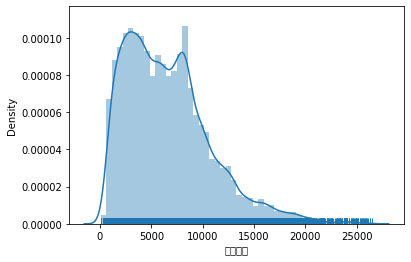

In [18]:
sns.distplot(active_ex['존속기간'], kde=True, rug=True)

---
#### 5-2 "기업개요"
---
    가장 오래된 기업의 일자: 26544일
    가장 짧은 기업의 일자: 65일

In [19]:
active_normal['설립일자'].isnull().sum()

1574

In [20]:
# 현 float64 형태를 str로 변경 해줘야 됨
# 빈 값들을 살려주기 위해 -1로 변환 후 다시 공백 변환
active_normal['설립일자'] = active_normal['설립일자'].fillna(-1).astype('int64').replace({-1:None})

# 1950년 보다 작게 설정된 값들은 오기입 으로 간주하고 모두 Null(-1)값으로 변환
for i in range(len(active_normal)):
  try:
    if active_normal['설립일자'][i] < 19500000 :
      active_normal['설립일자'][i] = -1
  except:
    pass

active_normal['설립일자'] = active_normal['설립일자'].fillna(-1).astype('str').replace({"-1":None})

In [21]:
# 데에티 중 20000700과 같이 일자가 00으로 체크된 데이터 01로 임의로 변경
for i in range(len(active_normal)):
  try:
    if active_normal['설립일자'][i][-2 : ] == '00':
      active_normal['설립일자'][i] = active_normal['설립일자'][i][:-2] + '01'
  except:
    pass
active_normal['설립일자'] = pd.to_datetime(active_normal['설립일자'],format='%Y-%m-%d')

In [22]:
active_normal['존속기간'] = None
today = datetime.now()
now_day = f'{today.year}{today.month}{today.day}'
# now_day = '20221027'
date_0 = datetime.strptime(now_day, '%Y%m%d')

for i in range(len(active_normal)):
  active_normal['존속기간'][i] = (date_0 - active_normal['설립일자'][i]).days

In [23]:
print('가장 오래된 기업의 일자:',active_normal['존속기간'].max())
print('가장 짧은 기업의 일자:',active_normal['존속기간'].min())
print('현재 기업 평균:',round(active_normal['존속기간'].mean()))

가장 오래된 기업의 일자: 26550
가장 짧은 기업의 일자: 71
현재 기업 평균: 4794


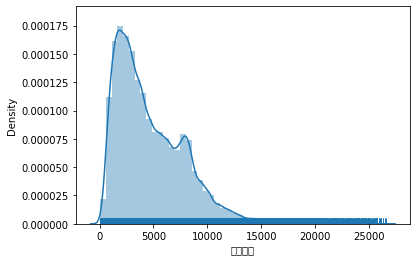

In [24]:
sns.distplot(active_normal['존속기간'], kde=True, rug=True)

---
### 6. 액티브 휴폐업이력 확인
---
- CLSBZ_GB
  - 1 = 부도
  - 2 = 휴업
  - 3 = 폐업
  - 4 = 피합병
  - 5 = 휴업취소
  - 6 = 폐업취소


    외감을 받는 기업은 자산총액이 120억 넘는 회사이기 때문에 휴폐업의 가능성이 더 적다는 것을 알 수 있다

In [25]:
ah = active_history['BIZ_NO'].tolist()
ae = active_ex['사업자등록번호'].tolist()
an = active_normal['사업자등록번호'].tolist()

print('액티브 "휴폐업" 데이터 수:',len(ah))
print('액티브 "기업개요_외감" 총 데이터 수:',len(ae))
print('액티브 "기업개요" 총 데이터 수:',len(an))
print('#'*60)

ah_ae = []
ah_an = []
for i in range(len(ah)):
  if ah[i] not in ae :
    ah_ae.append(ah[i])
  if ah[i] not in an:
    ah_an.append(ah[i])

print('휴폐업 데이터 사업자등록번호 중 "기업개요_외감"과 일치하지 않는 데이터 수:',len(ah_ae))
print('휴폐업 데이터 사업자등록번호 중 "기업개요"와 일치하지 않는 데이터 수:',len(ah_an))

액티브 "휴폐업" 데이터 수: 4827
액티브 "기업개요_외감" 총 데이터 수: 28982
액티브 "기업개요" 총 데이터 수: 198651
############################################################
휴폐업 데이터 사업자등록번호 중 "기업개요_외감"과 일치하지 않는 데이터 수: 3963
휴폐업 데이터 사업자등록번호 중 "기업개요"와 일치하지 않는 데이터 수: 0


---
- STAT_OCR_DATE이 존재하는 데이터에 대해서는 해당 값을 사용하는 것이 더 신뢰성이 높을 것이다 
---
   
        'STRT_DATE'는 휴폐업 데이터가 입수된 날짜,  
        'STAT_OCR_DATE'는 상태발생일자이고,  
        상태발생일자가 없는 경우는 해당 데이터가 입수되지 않은 것 입니다. 


1. 99991231로 작성된 데이터는 최신 데이터임을 의미한다. 이를 중간 제출일을 기준으로 작성하고자 20221027로 수정하겠다.

2. STRT_DATE에 작성된 20200731은 해당 데이터가 입수된 일자를 뜻한다.  
이는 즉, 해당 기간보다 먼저 어떤 휴폐업이 진행이 됐다고 하더라도 20200731로 작성이 된다.   
이는 신뢰성이 다소 떨어지기 때문에 해당 값은 None값으로 변경하겠다.


In [146]:
active_history = pd.read_excel('/content/drive/MyDrive/Numble_Challenge/data/액티브 중소법인 재무보유.xlsx', sheet_name = 2)

In [147]:
for i in range(len(active_history)):
  if active_history['END_DATE'][i] == 99991231:
    active_history['END_DATE'][i] = 20221027

for i in range(len(active_history)):
  if active_history['STRT_DATE'][i] == 20200731:
    active_history['STRT_DATE'][i] = None


In [148]:
active_history['END_DATE'] = active_history['END_DATE'].astype('str')
active_history['STRT_DATE'] = active_history['STRT_DATE'].fillna(0).astype('int64').astype('str').replace({'0':None})

active_history['END_DATE'] = pd.to_datetime(active_history['END_DATE'],format='%Y-%m-%d')
active_history['STRT_DATE'] = pd.to_datetime(active_history['STRT_DATE'],format='%Y-%m-%d')

In [149]:
# int 변경 후 str 타입으로 변경 후 datetime변경
active_history['STAT_OCR_DATE'] = active_history['STAT_OCR_DATE'].fillna(0).astype('int64').astype('str').replace({'0':None})
active_history['STAT_OCR_DATE'] = pd.to_datetime(active_history['STAT_OCR_DATE'],format='%Y-%m-%d')

In [150]:
# STAT_OCR_DATE컬럼 중 NaN값이 아닌 값을 STRT_DATE에 덮어씌우기
for i in range(len(active_history)):
  if isinstance(active_history['STAT_OCR_DATE'][i], pd._libs.tslibs.nattype.NaTType) == False:
    active_history['STRT_DATE'][i] = active_history['STAT_OCR_DATE'][i]


In [151]:
############ 사업자번호가 중복되는 값의 인덱스를 변환하기 위한 코드 ############

# 사업자번호의 중복값의 시작값은 True
a = active_history['BIZ_NO'].duplicated()

# 사업자번호 전체 인덱스 값 생성
b = list(range(len(a)))

for i in range(len(a)):
  if a[i] == True: # True 라는 것은 사업자번호가 중복되는 값의 시작점이며 다음 True가 나올때 까지 중복된 값임
    b.remove(i)

print(b)

[0, 2, 6, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 38, 40, 42, 44, 46, 48, 50, 52, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 85, 87, 89, 91, 93, 95, 97, 101, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 123, 127, 129, 133, 135, 137, 139, 141, 143, 145, 147, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 167, 169, 171, 173, 175, 177, 179, 181, 185, 187, 191, 193, 195, 201, 203, 205, 207, 209, 211, 213, 215, 217, 221, 223, 225, 227, 229, 231, 233, 235, 249, 251, 253, 257, 259, 261, 263, 265, 271, 273, 276, 279, 281, 283, 287, 291, 295, 297, 299, 300, 302, 303, 305, 307, 309, 311, 313, 315, 317, 319, 321, 323, 325, 327, 329, 330, 332, 333, 335, 337, 339, 341, 343, 345, 347, 349, 351, 353, 357, 365, 367, 369, 371, 375, 377, 378, 382, 384, 386, 388, 390, 392, 394, 396, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 424, 426, 428, 430, 432, 434, 435, 437, 439, 441, 443, 445, 447, 449, 451, 453, 455, 457, 459, 462, 464, 466, 468, 470, 472, 474, 47

In [152]:
############ 사업자번호 기준 슬라이싱한 값들의 첫번째 값의 STRT_DATE값이 NaT인 것의 개수 ############
count = 0

for i in b:
  if isinstance(active_history['STRT_DATE'][i], pd._libs.tslibs.nattype.NaTType) == True:
    count += 1
print(count)

787


    사업자번호가 같은 그룹으로 묶고난 값을 보면 한 회사가 휴업을 했다가 휴업을 취소하고 다시 휴업을 하는 등 변동폭이 많다

    변동을 포함한 휴폐업 일수를 확인하기 위해서 아래의 코드를 작성하였다

    
|index| BIZ_NO|	END_DATE|	STRT_DATE|	CLSBZ_GB|	STAT_OCR_DATE|	CLOSE_DATE|
|---|----|----|---|--|--|--|
|6	|사업자번호	|2022-10-27	|NaT	|5	|NaT	|3287|
|7	|사업자번호	|2013-10-27	|NaT	|2	|NaT	|979|
|8	|사업자번호	|2011-02-21	|NaT	|5	|NaT	|113|
|9	|사업자번호	|2010-10-31	|NaT	|2	|NaT	|174|
|10	|사업자번호	|2010-05-10	|NaT	|5	|NaT	|7|
|11	|사업자번호	|2010-05-03	|NaT	|2	|NaT	|NaN|

    위 표를 예시로, 들자면 
    1. 인덱스 11번 = 임의의 날 부터 2번(휴업)을 신청해 2010/5/3까지 N일을 휴업을 진행했다.
    2. 인덱스 10번 = 2010/5/3 부터 5번(휴업취소)을 신청해 2010/5/10까지 7일을 일했다(존속기간)
    3. 인덱스 9번 = 2010/5/10 부터 2번(휴업)을 신청해 2010/10/31까지 174일 휴업을 진행했다.
    4. 인덱스 8번 = 2010/10/31 부터 5번(휴업취소)을 신청해 2011/02/21까지 113일을 일했다
    5. 인덱스 7번 = 2011/02/21 부터 2번(휴업)을 신청해 2031/10/27까지 979일 휴업을 진행했다. 
    6. 인덱스 6번 = 2013/10/27 부터 5번(휴업취소)을 신청해 2022/10/27(=9999/12/31)까지 3287일을 일했다. 
      
    즉, 임의의 기간부터 가장 최신을 뜻하는 2022/10/27 까지 
    N일 +7 -174 + 113 - 979 + 3287 = 2254 + N일 동안 기업이 존속했다고 볼 수 있다.

In [153]:
# 휴폐업기간을 계산할 컬럼 생성
active_history['CLOSE_DATE'] = None 

# b함수는 사업자등록번호가 같은 인덱스 묶음의 리스트
for i in range(len(b)):
    try:
      # 같은 사업자번호를 가진 것끼리 슬라이싱
      active_history[b[i]:b[i+1]]
      # 같은 사업자번호를 가진 데이터의 길이 
      length = (b[i+1] - b[i])

      # 사업자번호 묶음의 기간 계산하기 위한 코드
      for j in list(range(length)):
        
        # 사업자번호 묶음의  마지막 행의 STRT_DATE값이 NaT 값이면 CLOSE_DATE값도 NaT으로 설정
        if ((b[i+1]-1) == ((b[i+1]-1) - (j))) & (isinstance(active_history['STRT_DATE'][(b[i+1]-1) - (j)], pd._libs.tslibs.nattype.NaTType) == True) == True:
          active_history['CLOSE_DATE'][(b[i+1]-1) - (j)] = None

        else:
          # NaT값인지 확인 
          if isinstance(active_history['STRT_DATE'][(b[i+1]-1) - (j)], pd._libs.tslibs.nattype.NaTType) == True:
            # NaT값이면 바로 아래 행의 STRT_DATE값이 NaT인지 확인
            if isinstance(active_history['STRT_DATE'][(b[i+1]-1) - (j-1) ], pd._libs.tslibs.nattype.NaTType) == True:
              # 바로 아래도 NaT값이면 기존 END_DATE랑 바로 아래 END_DATE랑 날짜를 빼서 휴폐업기간 계산
              active_history['CLOSE_DATE'][(b[i+1]-1) - (j)] = (active_history['END_DATE'][(b[i+1]-1)- (j)] - active_history['END_DATE'][(b[i+1]-1) - (j-1)]).days
            else:
              # 바로 아래 값이 NaT가 아니면, 기존 END_DATE랑 아래 END_DATE랑 날짜를 빼서 휴폐업기간 계산
              active_history['CLOSE_DATE'][(b[i+1]-1) - (j)] = (active_history['END_DATE'][(b[i+1]-1) - (j)] - active_history['END_DATE'][(b[i+1]-1) - (j-1)]).days
          # NaT값이 아니라면 END_DATE 에서 STRT_DATE값을 빼서 휴폐업기간 계산    
          else:
            active_history['CLOSE_DATE'][(b[i+1]-1) - (j)] = (active_history['END_DATE'][(b[i+1]-1) - (j)] - active_history['STRT_DATE'][(b[i+1]-1) - (j)]).days

    ################################################ b의 값 out of range 예외처리 ################################################
    except:
      active_history[4825:4827]
      # 같은 사업자번호를 가진 데이터의 길이 
      length = 2
      # 사업자번호 묶음의 기간 계산하기 위한 코드
      for h in list(range(length)):
        
        # 사업자번호 묶음의 첫 번째 행의 STRT_DATE값이 NaT 값이면 CLOSE_DATE값도 NaT으로 설정
        if (4826 == ((4827-1) - (h))) & (isinstance(active_history['STRT_DATE'][(4827-1) - (h)], pd._libs.tslibs.nattype.NaTType) == True) == True:
          active_history['CLOSE_DATE'][(4827-1) - (h)] = None
          
        else:
          # NaT값인지 확인 
          if isinstance(active_history['STRT_DATE'][(4827-1) - (h)], pd._libs.tslibs.nattype.NaTType) == True:
            # NaT값이면 바로 아래 행의 STRT_DATE값이 NaT인지 확인
            if isinstance(active_history['STRT_DATE'][(4827-1) - (h+1) ], pd._libs.tslibs.nattype.NaTType) == True:
              # 바로 아래도 NaT값이면 기존 END_DATE랑 바로 아래 END_DATE랑 날짜를 빼서 휴폐업기간 계산
              active_history['CLOSE_DATE'][(4827-1) - (h)] = (active_history['END_DATE'][(4827-1) - (h)] - active_history['END_DATE'][(4827-1) - (h-1)]).days
            else:
              # 바로 아래 값이 NaT가 아니면, 기존 END_DATE랑 아래 END_DATE랑 날짜를 빼서 휴폐업기간 계산
              active_history['CLOSE_DATE'][(4827-1) - (h)] = (active_history['END_DATE'][(4827-1) - (h)] - active_history['END_DATE'][(4827-1) - (h-1)]).days
          # NaT값이 아니라면 END_DATE 에서 STRT_DATE값을 빼서 휴폐업기간 계산    
          else:
            active_history['CLOSE_DATE'][(4827-1) - (h)] = (active_history['END_DATE'][(4827-1) - (h)] - active_history['STRT_DATE'][(4827-1) - (h)]).days
    ####################################################################################################



---
- 사업자별 존속기간 확인
---

In [165]:
active_history['DURATION'] = None 

for i in range(len(b)):
  try:
    # 같은 사업자번호를 가진 것끼리 슬라이싱
    active_history[b[i]:b[i+1]]
    # 같은 사업자번호를 가진 데이터의 길이 
    length = (b[i+1] - b[i])
    
    count = 0 
    for j in list(range(length)):
      # 휴폐업 이력의 숫자
      number = active_history['CLSBZ_GB'][(b[i+1]-1) - (j)]
      # 휴폐업 일수
      date = active_history['CLOSE_DATE'][(b[i+1]-1) - (j)]
      # 휴폐업 일수의 값이 NaN일 경우에는 넘어가야 하기 때문에 try except문 사용 
      if date != None:
        if number in (1,2,3,4):
          count -= date
        else: 
          count += date
      else: 
        pass

    active_history['DURATION'][b[i]] = count

  ##################### b의 값 out of range 예외처리 #####################
  except:
    active_history[4825:4827]
    length = 2
    
    count = 0 
    for j in list(range(length)):
      number = active_history['CLSBZ_GB'][(4827-1) - (j)]
      date = active_history['CLOSE_DATE'][(4827-1) - (j)]
      if date != None:
        if number in (1,2,3,4):
          count -= date
        else: 
          count += date
      else: 
        pass

    active_history['DURATION'][b[i]] = count
    ##################################################################

In [ ]:
active_history

In [168]:
# DURATION 값이 잘 들어갔는지 확인
print('사업자등록번호의 수:',len(set(active_history['BIZ_NO'].tolist())))
print('존속기간이 작성된 행의 수:',len(active_history) - active_history['DURATION'].isnull().sum())

사업자등록번호의 수: 2083
존속기간이 작성된 행의 수: 2083


In [169]:
print('존속기간의 값이 음수인 수:',len(active_history[active_history['DURATION'] < 0]))

존속기간의 값이 음수인 수: 219


- 휴폐업을 오랜 기간동안 진행하고 취소를 한지 얼마되지 않았다면 음수가 나올 수도 있다.   
특히 END_DATE값이 가장 최신(=2022-10-27)을 의미하는 값이 있다면 음수가 나와도 무방할 것이다.

In [185]:
# 음수의 값이 나오는 데이터프레임 생성 
minus = active_history[active_history['DURATION'] < 0]
minus = minus.reset_index(drop = True)

# 가장 최신(2022-10-27)의 값을 가지는 기준점
standard = active_history['END_DATE'][0]

count = len(minus)
for i in range(len(minus)):
  if minus['END_DATE'][i] == standard:
    count -= 1
print('가장 최신(=2022-10-27)의 값을 가지지 않으면서, DURATION의 값이 음수인 개수:', count)

가장 최신(=2022-10-27)의 값을 가지지 않으면서, DURATION의 값이 음수인 개수: 0


---
### 7. 기업개요_외감에 있는 기업들이 재무제표 데이터에도 있는가?
---
    기업개요_외감에 있는 28982개의 기업들의 재무제표는  
    재무제표 데이터에 모두 들어있음을 확인

In [42]:
active_count = 0

for i in range(len(active_ex)):
  try:
    number = active_ex['사업자등록번호'][i]
    finance.query(f"사업자번호 == {number}")
    active_count += 1
  except:
    pass
print('액티브 "기업개요_외감"의 총 숫자:',len(active_ex))
print('액티브 "기업개요_외감"에 들어있는 기업들이 재무재표 데이터에 등록된 데이터 수:',active_count)

액티브 "기업개요_외감"의 총 숫자: 28982
액티브 "기업개요_외감"에 들어있는 기업들이 재무재표 데이터에 등록된 데이터 수: 28982


---
### 8. 기타
---

---
- 개인법인 구분에서 개인 데이터만 존재
---

In [43]:
# Null값은 없음
active_normal['개인법인구분 1.법인 2.개인'].isnull().sum()

0

In [44]:
print('#'*70)
print(len(active_normal))
print(active_normal['개인법인구분 1.법인 2.개인'].value_counts())
print('#'*70)
print(len(active_ex))
print(active_ex['개인법인구분 1.법인 2.개인'].value_counts())
print('#'*70)

######################################################################
198651
1    198651
Name: 개인법인구분 1.법인 2.개인, dtype: int64
######################################################################
28982
1    28982
Name: 개인법인구분 1.법인 2.개인, dtype: int64
######################################################################


---
- "기업개요_외감" 데이터에서 본지점 구분에서는 본점의 비율이 앞도적으로 높다
---
    본점 : 26070
    분점 : 2912

In [45]:
# Null값은 없음
print('#'*70)
print('Null값의 수:',active_ex['본점지점구분 1.본점 2.지점'].isnull().sum())
print('#'*70)
print(active_ex['본점지점구분 1.본점 2.지점'].value_counts())
print('#'*70)

######################################################################
Null값의 수: 0
######################################################################
1    26070
2     2912
Name: 본점지점구분 1.본점 2.지점, dtype: int64
######################################################################


---
- "기업개요" 데이터에서 본지점 구분에서는 본점의 비율이 앞도적으로 높다
---
    본점 : 193740
    분점 : 4911

In [46]:
# Null값은 없음
print('#'*70)
print('Null값의 수:',active_normal['본점지점구분 1.본점 2.지점'].isnull().sum())
print('#'*70)
print(active_normal['본점지점구분 1.본점 2.지점'].value_counts())
print('#'*70)

######################################################################
Null값의 수: 0
######################################################################
1    193740
2      4911
Name: 본점지점구분 1.본점 2.지점, dtype: int64
######################################################################


---
- "기업개요_외감" 데이터에서 벤처기업 여부는 아닌 경우가 대부분이다.
---
    벤처기업 O: 2812
    벤처기업 X: 26170

In [47]:
# Null값은 없음
print('#'*70)
print('Null값의 수:',active_ex['벤처기업여부'].isnull().sum())
print('#'*70)
print(active_ex['벤처기업여부'].value_counts())
print('#'*70)

######################################################################
Null값의 수: 0
######################################################################
N    26170
Y     2812
Name: 벤처기업여부, dtype: int64
######################################################################


---
- "기업개요" 데이터에서 벤처기업 여부는 아닌 경우가 대부분이다.
---
    벤처기업 O: 27809
    벤처기업 X: 170842

In [48]:
# Null값은 없음
print('#'*70)
print('Null값의 수:',active_normal['벤처기업여부'].isnull().sum())
print('#'*70)
print(active_normal['벤처기업여부'].value_counts())
print('#'*70)

######################################################################
Null값의 수: 0
######################################################################
N    170842
Y     27809
Name: 벤처기업여부, dtype: int64
######################################################################


---
# 휴폐업 데이터 살펴보기
---

---
### 1. 컬럼명 한글로 변경
---

In [49]:
# 컬럼명이 일치하는 인덱스 확인
close_name = close_normal.columns.tolist()


close_list = []
for i in close_name:
  try:
    close_list.append(eng.index(i))
  except:
    pass

print(close_list)
print(len(close_list))
  
# 한글로 컬럼명 변경
for i in close_list:
  close_normal = close_normal.rename(columns={eng[i] : kor[i]})

print(close_normal.columns)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
28
Index(['사업자등록번호', '기업접두명', '기업명', '기업접미명', '기업영문명', '업종', '기업규모',
       '공기업구분 1.공기업 2.일반기업', '개인법인구분 1.법인 2.개인', '본점지점구분 1.본점 2.지점',
       '국외투자법인여부', '벤처기업여부', '상장코드', '산업코드차수', '산업코드1', '산업코드2', '산업코드3',
       '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명',
       '홈페이지URL', '대표자명', '직원수'],
      dtype='object')


---
### 2. 기업개요에 있는 기업들이 재무제표 데이터에도 있는가?
---

    기업개요에 있는 6739개의 기업들의 재무제표는  
    재무제표 데이터에 모두 들어있음을 확인
    

In [50]:
close_count = 0

for i in range(len(close_normal)):
  try:
    number = close_normal['사업자등록번호'][i]
    finance.query(f"사업자번호 == {number}")
    close_count += 1
  except:
    pass
print('휴폐업 중소법인 재무보유.xlsx의 총 숫자:',len(close_normal))
print('휴페업 데이터 안에 기업 중 재무재표에 등록된 데이터 수:',close_count)

휴폐업 중소법인 재무보유.xlsx의 총 숫자: 6739
휴페업 데이터 안에 기업 중 재무재표에 등록된 데이터 수: 6739


---
### 3. 액티브 "기업개요_외감" 과 "휴페업" 중복 확인 (사업자번호 기준)
---

    액티브 + 휴페업 = 35721  
    재무제표 데이터 중복제거 = 35709  

    액티브 "기업개요_외감" 과 "휴폐업"의 사업자등록번호를 기준으로 재무제표에 들어있는지 확인 했을 때에는 모두 빠짐없이 들어있음을 확인하였다  
    재무제표의 중복을 제거한 갯수와 위의 2개를 합친 갯수가 일치하지 않는다  
      

    12개는 무엇?

In [51]:
print('중복제거 전 사업자번호 등록 수:',len(finance['사업자번호'].tolist()))
print('중복제거 후 사업자번호 등록 수:',len(set(finance['사업자번호'].tolist())))

중복제거 전 사업자번호 등록 수: 109142
중복제거 후 사업자번호 등록 수: 35709


---
- 액티브와 휴페업의 중복 데이터 확인1
---

In [52]:
qq = set(finance['사업자번호'].tolist())

count = 0
for i in range(len(active_ex)):
  if active_ex['사업자등록번호'][i] not in qq :
    count += 0 
print(count)

for j in range(len(close_normal)):
  if close_normal['사업자등록번호'][j] not in qq:
    count += 0
print(count)

0
0


---
- 액티브와 휴페업의 중복 데이터 확인2
---

In [53]:
test = pd.concat([close_normal['사업자등록번호'], active_ex['사업자등록번호']], ignore_index = True)
print(len(set(test)))
print(test.isnull().sum())

35721
0


In [54]:
close_normal['개인법인구분 1.법인 2.개인'].value_counts()

1    6739
Name: 개인법인구분 1.법인 2.개인, dtype: int64

In [55]:
active_ex.shape

(28982, 29)